<a href="https://colab.research.google.com/github/mokhs000/2020-2-AI/blob/master/code/07_reg_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

# 활성화 함수

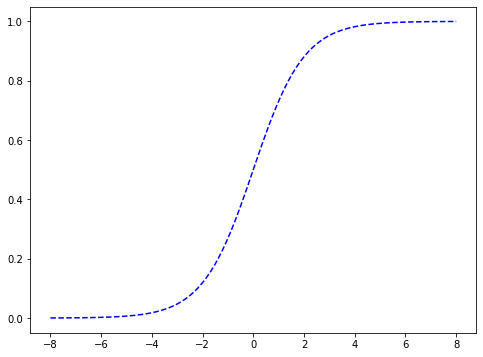

In [2]:
import numpy as np
import matplotlib.pylab as plt

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, sigm_func(x), 'b--')

In [3]:
np.e

2.718281828459045

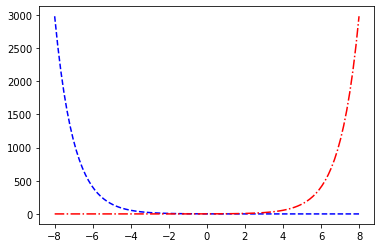

In [4]:
plt.figure(figsize=(6, 4)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, np.exp(-x), 'b--')
_ = plt.plot(x, np.exp(x), 'r-.')

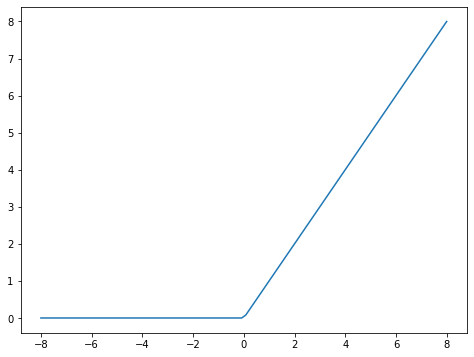

In [5]:
import numpy as np
import matplotlib.pylab as plt

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

# ReLU 함수 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, relu_func(x))

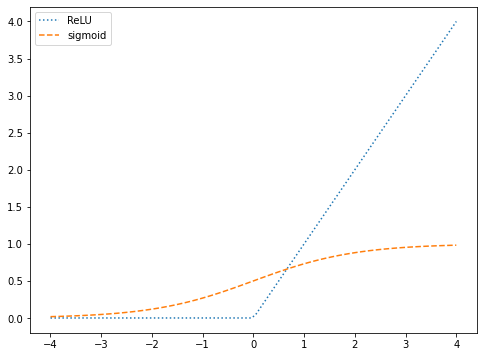

In [6]:
import numpy as np
import matplotlib.pylab as plt

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-4, 4, 100)
y = np.linspace(-0.2, 2, 100)

plt.plot(x, relu_func(x), linestyle=':', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

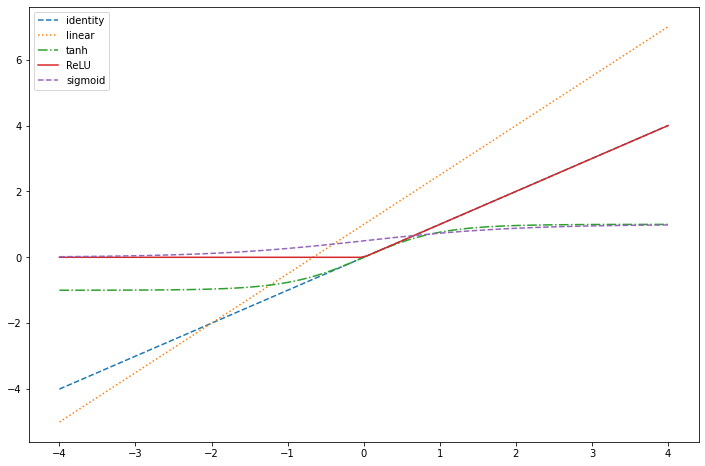

In [7]:
import numpy as np
import matplotlib.pylab as plt
 
def identity_func(x): # 항등함수
    return x
  
def linear_func(x): # 1차함수
    return 1.5 * x + 1 # a기울기(1.5), Y절편b(1) 조정가능

def tanh_func(x): # TanH 함수
    return np.tanh(x)

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(12, 8)) 
x = np.linspace(-4, 4, 100)

plt.plot(x, identity_func(x), linestyle='--', label="identity")
plt.plot(x, linear_func(x), linestyle=':', label="linear")
plt.plot(x, tanh_func(x), linestyle='-.', label="tanh")
plt.plot(x, relu_func(x), linestyle='-', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')


# 케라스로 구현하는 선형 회귀

In [8]:
import tensorflow as tf

# ① 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# ② 모델 구성(생성)
model = tf.keras.models.Sequential([
    #                   출력, 입력=(*, 1)           그대로 출력
    tf.keras.layers.Dense(1, input_shape=(1, ), activation='linear')
    #Dense(1, input_dim=1)
])

In [9]:
# ③ 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력 정보를 지정
# Mean Absolute Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse',
              metrics=['mae', 'mse'])

In [10]:
# 모델을 표시(시각화)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# ④ 생성된 모델로 훈련 데이터 학습
# 훈련과정 정보를 history 객체에 저장 
history = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 17.3744 - mae: 3.8051 - mse: 17.3744
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 12.0665 - mae: 3.1582 - mse: 12.0665
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 8.3834 - mae: 2.6194 - mse: 8.3834
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 5.8277 - mae: 2.1706 - mse: 5.8277
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 4.0543 - mae: 1.7968 - mse: 4.0543
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 2.8238 - mae: 1.4855 - mse: 2.8238
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 1.9698 - mae: 1.2262 - mse: 1.9698
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 1.3772 - mae: 1.0102 - mse: 1.3772
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.9660 - mae: 0.8303 - mse: 0.9660
Epoch 10/500
1/1 [========================

In [12]:
# ⑤ 테스트 데이터로 성능 평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('손실:', model.evaluate(x_test, y_test))

1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - mae: 0.0388 - mse: 0.0019
손실: [0.0018885866738855839, 0.03876602649688721, 0.0018885866738855839]


In [13]:
# x = [3.5, 5, 5.5, 6]의 예측 
print(model.predict([3.5, 5, 5.5, 6]))

pred = model.predict([3.5, 5, 5.5, 6])
# 예측 값만 1차원으로 
print(pred.flatten())
print(pred.squeeze())

[[ 6.980269]
 [ 9.927406]
 [10.909785]
 [11.892165]]
[ 6.980269  9.927406 10.909785 11.892165]
[ 6.980269  9.927406 10.909785 11.892165]


## 손실과 예측 시각화

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'mse'])

Text(0, 0.5, 'loss')

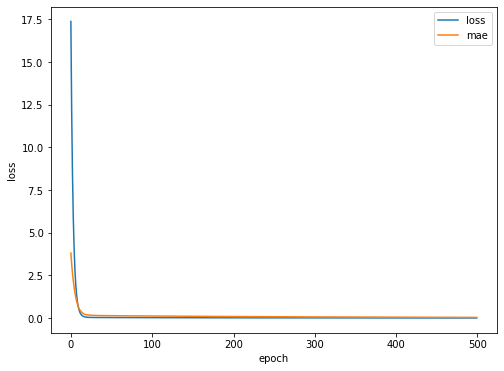

In [15]:
import matplotlib.pylab as plt

# 그래프 그리기
fig = plt.figure(figsize=(8, 6)) 

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
#plt.plot(history.history['mse'], label='mse')

plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'y')

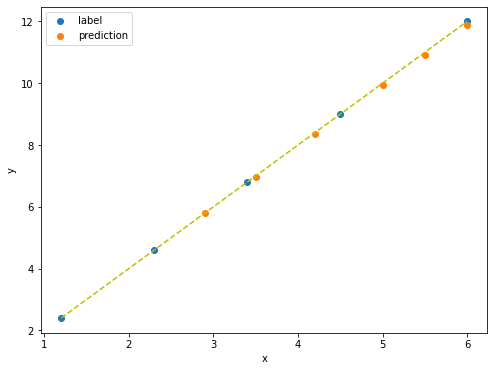

In [16]:
import matplotlib.pylab as plt

x_test = [1.2, 2.3, 3.4, 4.5, 6.0]
y_test = [2.4, 4.6, 6.8, 9.0, 12.0]

# 그래프 그리기
fig = plt.figure(figsize=(8, 6)) 

plt.scatter(x_test, y_test, label='label')
plt.plot(x_test, y_test, 'y--')

x = [2.9, 3.5, 4.2, 5, 5.5, 6]
pred = model.predict(x)
plt.scatter(x, pred.flatten(), label='prediction')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [18]:
#from keras.models import Sequential
#from keras.layers import Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ① 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# ② 모델 구성(생성)
model = Sequential([
    Dense(1, input_shape=(1, ), activation='linear')
    #Dense(1, input_dim=1)
])

# ③ 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 선택
# Mean Absolute Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse',
              metrics=['mae', 'mse'])

# 모델을 표시(시각화)
model.summary()

# ④ 생성된 모델로 훈련 데이터 학습
model.fit(x_train, y_train, epochs=1000)

# ⑤ 테스트 데이터로 성능 평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('정확도:', model.evaluate(x_test, y_test))

print(model.predict([3.5, 5, 5.5, 6]))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8502 - mae: 0.8417 - mse: 0.8502
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5905 - mae: 0.6986 - mse: 0.5905
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4102 - mae: 0.5794 - mse: 0.4102
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2852 - mae: 0.4802 - mse: 0.2852
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1984 - mae: 0.3975 - mse: 0.1984
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1382 - mae: 0.3286 - mse: 0.1382
Epoch 7/1000

# y = 2x + 1 예측

In [19]:
import tensorflow as tf
import numpy as np

#훈련과 테스트 데이터
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9]) #y = x * 2 + 1

#인공신경망 모델 사용
model = tf.keras.models.Sequential()

#은닉계층 하나 추가 
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

#모델의 패라미터를 지정하고 모델 구조를 생성
#최적화 알고리즘: 확률적 경사 하강법(SGD: Stochastic Gradient Descent)
#손실 함수(loss function): 평균제곱오차(MSE: Mean Square Error)  
model.compile('SGD', 'mse')

#생성된 모델로 훈련 자료로 입력(x[:2])과 출력(y[:2])을 사용하여 학습
#키워드 매개변수 epoch(에퐄): 훈련반복횟수
#키워드 매개변수 verbose: 학습진행사항 표시
model.fit(x[:3], y[:3], epochs=1000, verbose=0)

#테스트 자료의 결과를 출력
print('Targets(정답):', y[3:])

#학습된 모델로 테스트 자료로 결과를 예측(model.predict)하여 출력
print('Predictions(예측):', model.predict(x[3:]).flatten())

Targets(정답): [7 9]
Predictions(예측): [6.9999447 8.99991  ]


# 텐서플로로만 구현하는 선형 회귀 예제

In [20]:
import tensorflow as tf
# ① 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# ② 모델 구성(생성)
# 선형회귀 모델(Wx + b)을 위한 tf.Variable을 선언합니다.
W = tf.Variable(tf.random.normal(shape=[1]))
b = tf.Variable(tf.random.normal(shape=[1]))

@tf.function
def linear_model(x):
    return W*x + b

# ③ 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 최적화를 위한 그라디언트 디센트 옵티마이저를 정의합니다.
optimizer = tf.optimizers.SGD(0.01)

# 손실 함수를 정의합니다. MSE 손실함수 \mean{(y' - y)^2}
@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

# ④ 생성된 모델로 훈련 데이터 학습
# 최적화를 위한 function을 정의합니다.
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        y_pred = linear_model(x) # 모델에 위한 예측 값 계산
        loss = mse_loss(y_pred, y) # MSE 손실 계산
    gradients = tape.gradient(loss, [W, b]) # 미분 자동계산
    optimizer.apply_gradients(zip(gradients, [W, b])) # 최적화 과정에 적용

# 경사하강법을 1000번 수행합니다.
for i in range(1000):
    train_step(x_train, y_train)

# ⑤ 테스트 데이터로 성능 평가
x_test = [3.5, 5, 5.5, 6]

# 테스트 데이터를 이용해 학습된 선형회귀 모델이 데이터의 경향성(y=2x)을 잘 학습했는지 측정합니다.
# 예상되는 참값 : [7, 10, 11, 12]
print(linear_model(x_test).numpy())

[ 6.9873385  9.953417  10.942109  11.930801 ]


* exercise

In [21]:
import tensorflow as tf

x = tf.ones((2, 2))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)

# 입력 텐서 x에 대한 z의 도함수
dz_dx = t.gradient(z, x)
for i in [0, 1]:
    for j in [0, 1]:
        assert dz_dx[i][j].numpy() == 8.0